
# Sobre o Conjunto de Dados

### Visão geral do Conjunto de Dados:
O Conjunto de Dados de Saúde e Estilo de Vida do Sono é composto por 400 linhas e 13 colunas, abrangendo uma ampla gama de variáveis relacionadas ao sono e hábitos diários. Ele inclui detalhes como gênero, idade, ocupação, duração do sono, qualidade do sono, nível de atividade física, níveis de estresse, categoria de IMC (Índice de Massa Corporal), pressão arterial, frequência cardíaca, passos diários e a presença ou ausência de distúrbios do sono.

### Recursos principais do Conjunto de Dados:
* Métricas abrangentes do sono: Explore a duração, qualidade e fatores que influenciam os padrões de sono.
* Fatores de estilo de vida: Analise os níveis de atividade física, níveis de estresse e categorias de IMC.
* Saúde cardiovascular: Examine as medições da pressão arterial e frequência cardíaca.
* Análise de distúrbios do sono: Identifique a ocorrência de distúrbios do sono, como insônia e apneia do sono.

### Colunas do Conjunto de Dados:
* __ID da pessoa:__ Um identificador para cada indivíduo.
* __Gênero:__ O gênero da pessoa (Masculino/Feminino).
* __Idade:__ A idade da pessoa em anos.
* __Ocupação:__ A ocupação ou profissão da pessoa.
* __Duração do sono (horas):__ O número de horas que a pessoa dorme por dia.
* __Qualidade do sono (escala: 1-10) :__ Uma avaliação subjetiva da qualidade do sono, variando de 1 a 10.
* __Nível de atividade física (minutos/dia):__ O número de minutos que a pessoa se dedica à atividade física diariamente.
* __Nível de estresse (escala: 1-10):__ Uma avaliação subjetiva do nível de estresse experimentado pela pessoa, variando de 1 a 10.
* __Categoria de IMC:__ A categoria de IMC da pessoa (por exemplo, Abaixo do peso, Normal, Acima do peso).
* __Pressão arterial (sistólica/diastólica):__ A medição da pressão arterial da pessoa, indicada como pressão sistólica sobre pressão diastólica.
* __Frequência cardíaca (bpm):__ A frequência cardíaca em repouso da pessoa em batimentos por minuto.
* __Passos diários:__ O número de passos que a pessoa dá por dia.
* __Distúrbio do sono:__ A presença ou ausência de um distúrbio do sono na pessoa (Nenhum, Insônia, Apneia do sono).

### Detalhes sobre a coluna Distúrbio do Sono:

* __Nenhum:__ O indivíduo não apresenta nenhum distúrbio do sono específico.
* __Insônia:__ O indivíduo tem dificuldade para dormir ou permanecer dormindo, resultando em sono / * * inadequado ou de má qualidade.
* __Apneia do sono:__ O indivíduo sofre pausas na respiração durante o sono, resultando em padrões de sono interrompidos e riscos potenciais para a saúde.

# Analise Exploratoria e tratamento

In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'dataset/SleepHealthAndLifestyleDataset.csv',sep=',')

In [3]:
data.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


### Função para plotar uma tabela

In [4]:
def tabela(data,title = 'Null',y=1.6):
    table = plt.table(
        data.values,
        colLabels=data.columns.to_list(),
        loc='center'
    )
    table.set_fontsize(29)
    table.scale(4,4)
    plt.title(title,y=y,size=20)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
    for pos in ['right','top','bottom','left']:
        plt.gca().spines[pos].set_visible(False)
    plt.show()

### Tradução das colunas para melhor visualização e compreensão

In [5]:
colunas = [
    'ID da pessoa',
    'Gênero',
    'Idade' ,
    'Ocupação',
    'Duração do sono (horas)',
    'Qualidade do sono (escala: 1-10)',
    'Nível de atividade física (minutos/dia)',
    'Nível de estresse (escala: 1-10)',
    'Categoria de IMC',
    'Pressão arterial (sistólica/diastólica)',
    'Frequência cardíaca (bpm)',
    'Passos diários',
    'Distúrbio do sono'
]
data.columns = colunas

In [6]:
data.head(3)

,ID da pessoa,Gênero,Idade,Ocupação,Duração do sono (horas),Qualidade do sono (escala: 1-10),Nível de atividade física (minutos/dia),Nível de estresse (escala: 1-10),Categoria de IMC,Pressão arterial (sistólica/diastólica),Frequência cardíaca (bpm),Passos diários,Distúrbio do sono
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


In [7]:
try:
    data['Distúrbio do sono'].loc[data['Distúrbio do sono'].isnull()] = 'Nulo'
except pd.errors.SettingWithCopyWarning:
    pass

/tmp/ipykernel_4603/267413661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Distúrbio do sono'].loc[data['Distúrbio do sono'].isnull()] = 'Nulo'


## Tratemento dos dados para analise
Para melhor analises dos dados se faz necessário o tratamento dos mesmo.

#### Pressão arterial (sistólica/diastólica)
Dividindo valores de transfomando em colunas 

* Pressão arterial sistólica
* Pressão arterial diastólica


In [8]:
PressaoArterial = data['Pressão arterial (sistólica/diastólica)']
PressaoArterial = PressaoArterial.reset_index()
PressaoArterial.head(3)

,index,Pressão arterial (sistólica/diastólica)
0,0,126/83
1,1,125/80
2,2,125/80


##### Dividindo

In [9]:
data[
    ['Pressão arterial sistólica','Pressão arterial diastólica']
    ] = PressaoArterial['Pressão arterial (sistólica/diastólica)'].str.split('/',expand=True)

##### Convertendo para numeros

In [10]:
data['Pressão arterial diastólica'] = data['Pressão arterial diastólica'].astype(int)
data['Pressão arterial sistólica']  = data['Pressão arterial sistólica'].astype(int)

In [11]:
data.drop(columns='Pressão arterial (sistólica/diastólica)',inplace=True)

In [12]:
data[['Pressão arterial diastólica','Pressão arterial sistólica']].head(3)

,Pressão arterial diastólica,Pressão arterial sistólica
0,83,126
1,80,125
2,80,125


### Visualização dos dados

#### PairPlot

/home/mateus/MEGA/Projetos/Classfica-aoQualidadeDoSono/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


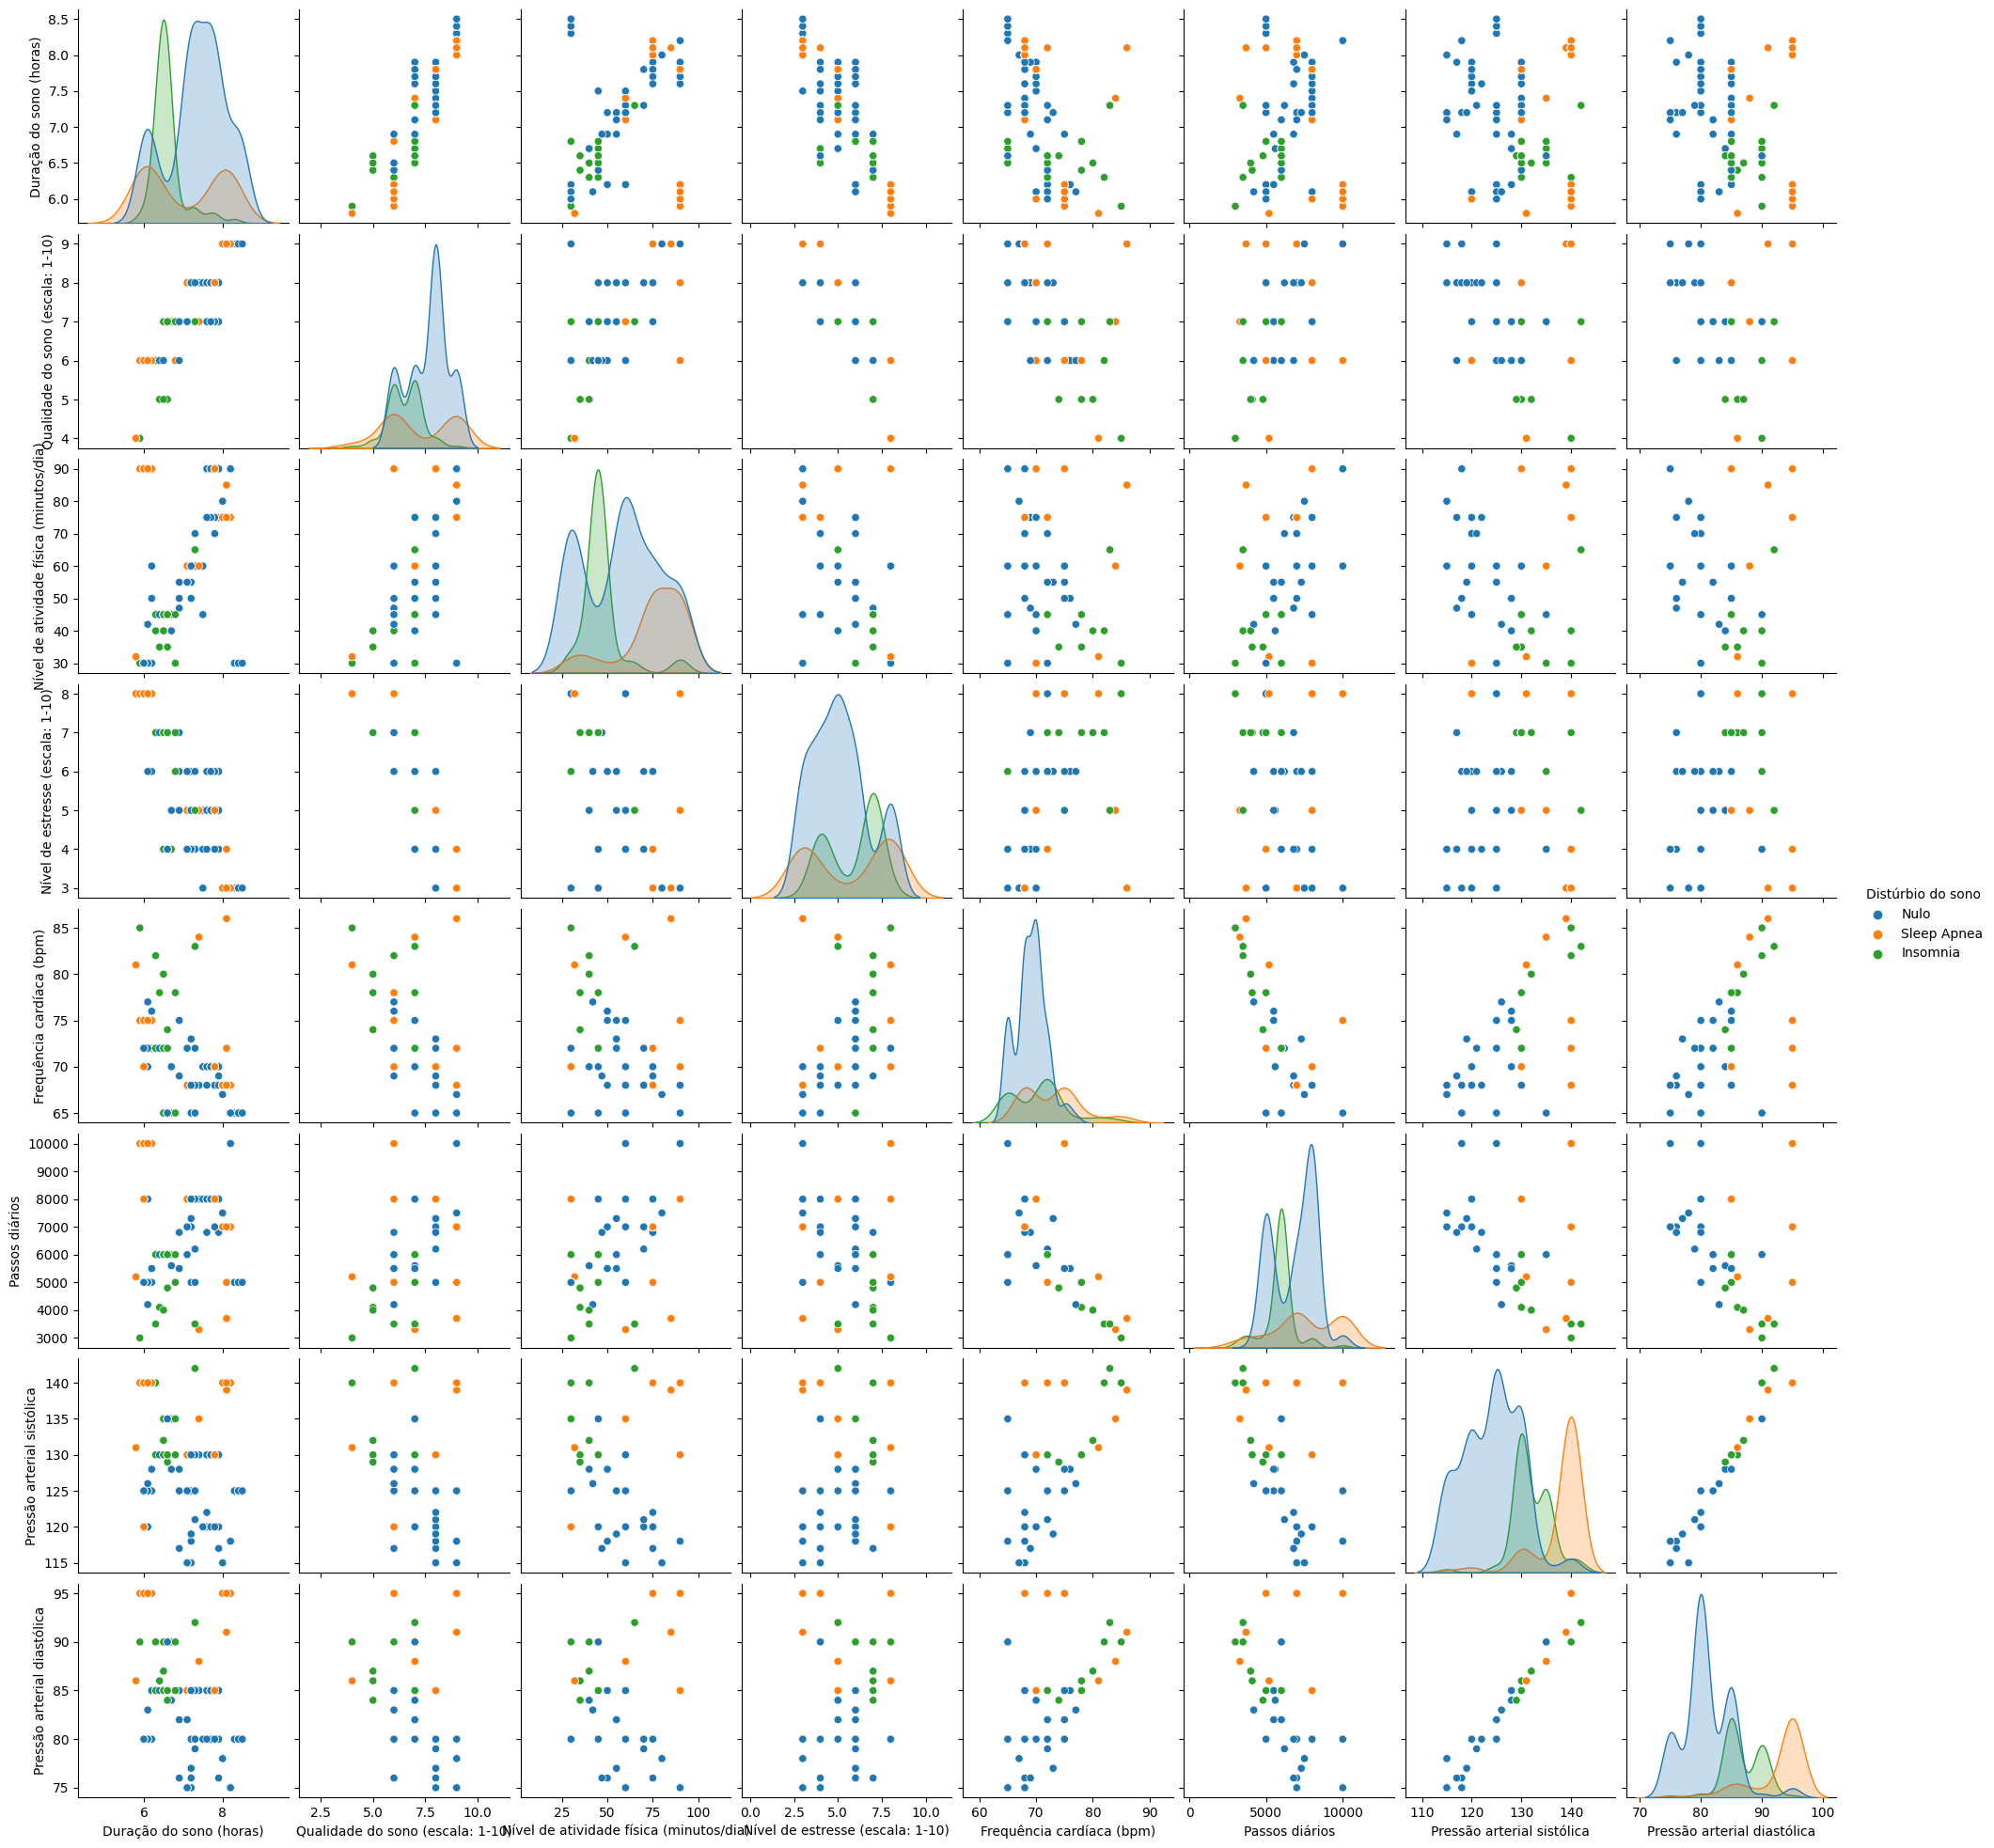

In [13]:
sea.pairplot(data.drop(columns=['ID da pessoa','Gênero','Idade' ]),hue='Distúrbio do sono')

####  Idade x Duração 

<Axes: xlabel='Idade', ylabel='Duração do sono (horas)'>

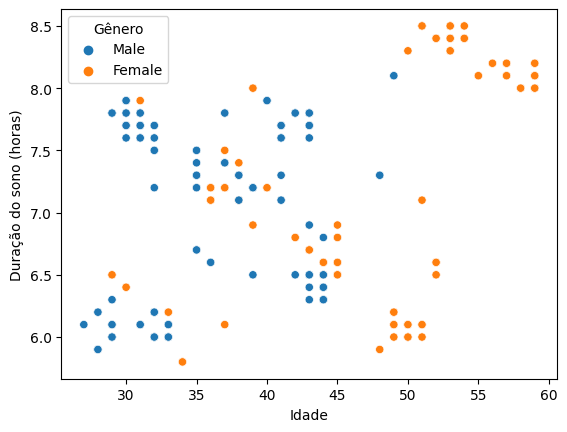

In [14]:
sea.scatterplot(
    x = data['Idade'],
    y = data['Duração do sono (horas)'],
    hue = data['Gênero']
)

#### Pressão arterial

<Axes: xlabel='Pressão arterial diastólica', ylabel='Pressão arterial sistólica'>

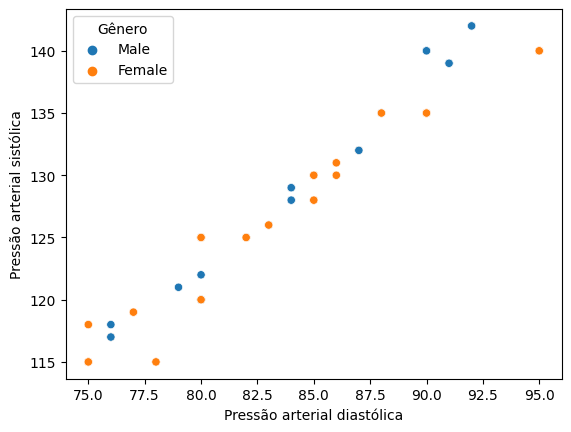

In [15]:
sea.scatterplot(
    x = data['Pressão arterial diastólica'],
    y = data['Pressão arterial sistólica'],
    hue= data['Gênero']
)

##### Ocupação 

In [16]:
data['Ocupação'].value_counts()

Ocupação
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [17]:
ocupacao = data.groupby(by='Ocupação')[
                    ['Duração do sono (horas)','Qualidade do sono (escala: 1-10)','Nível de estresse (escala: 1-10)']
                ].mean().reset_index()

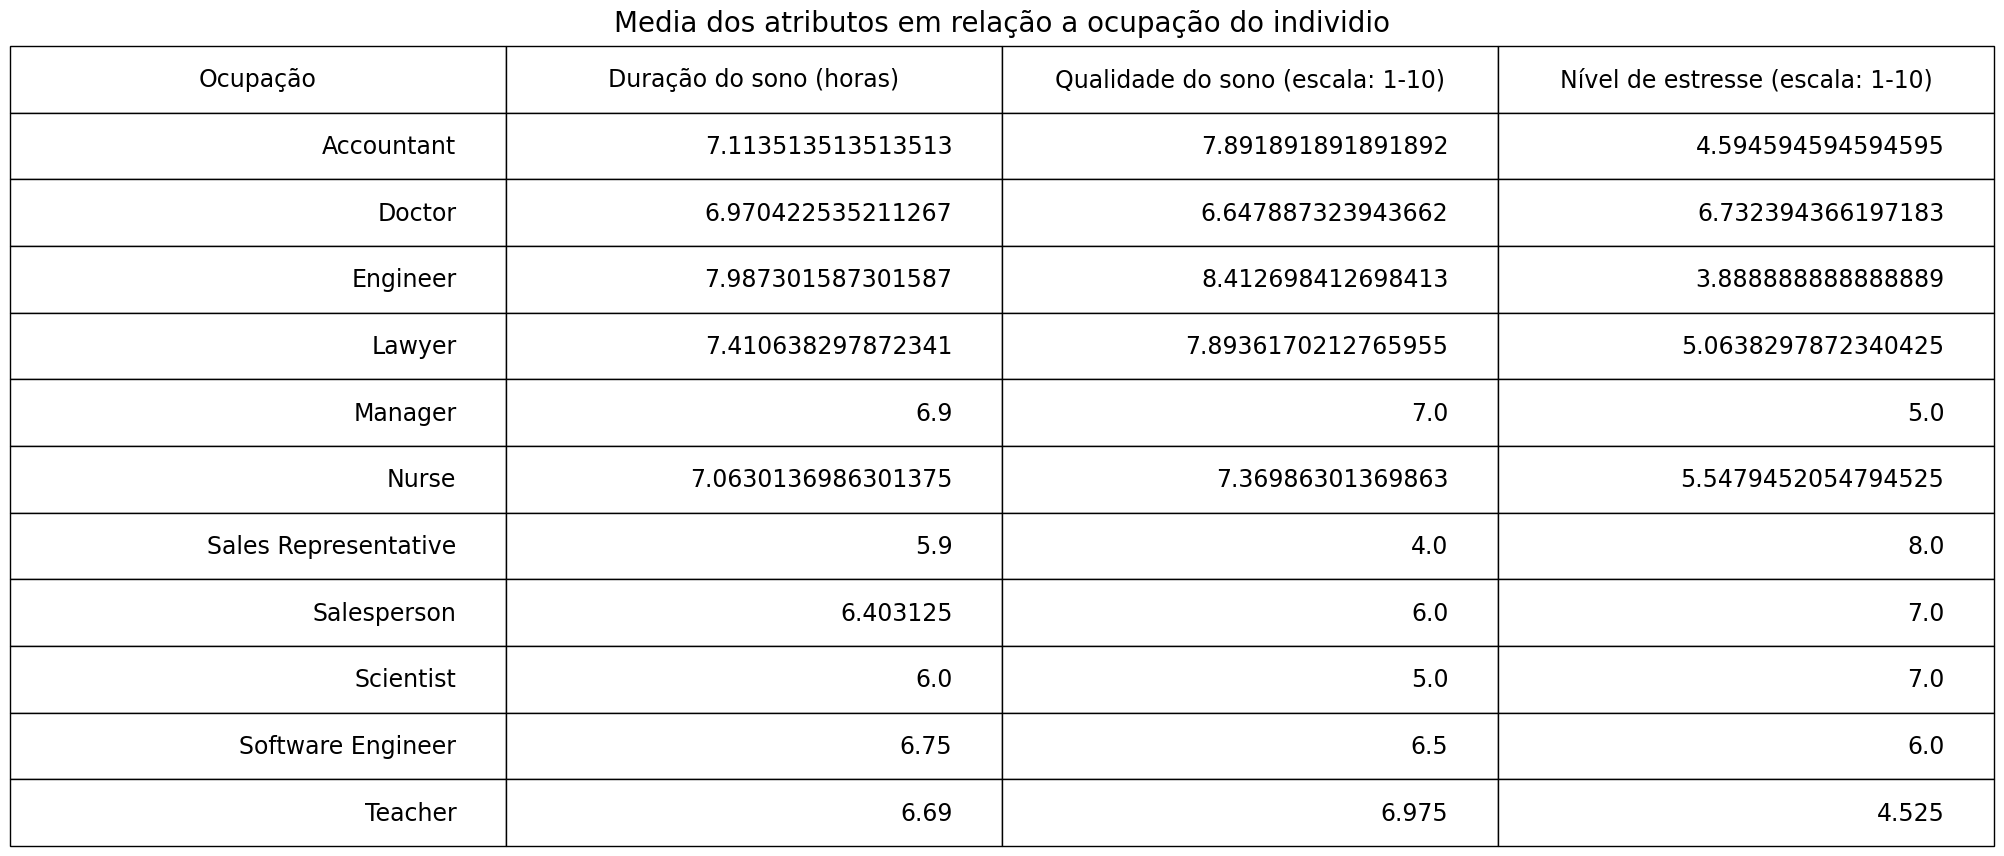

In [18]:
tabela(ocupacao,'Media dos atributos em relação a ocupação do individio',y=1.6)

#### Genero

In [19]:
genero = data.groupby(by='Gênero')[
   ['Duração do sono (horas)','Qualidade do sono (escala: 1-10)','Nível de estresse (escala: 1-10)']
    ].mean().reset_index()

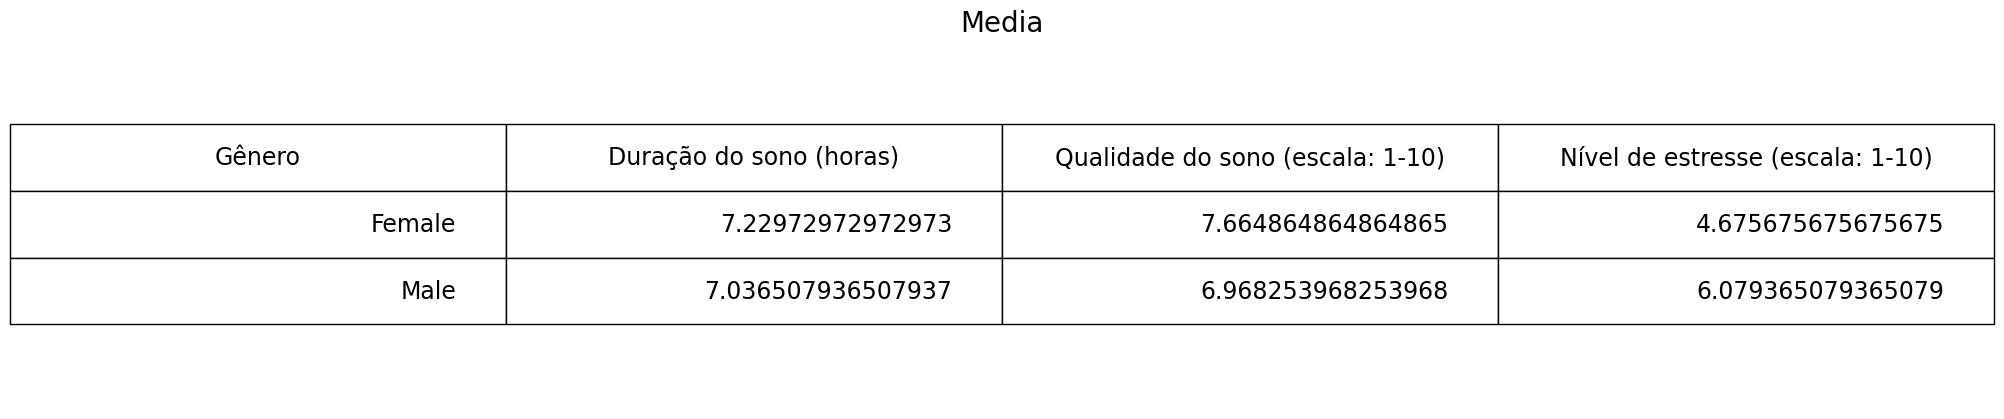

In [20]:
tabela(genero,title='Media',y=1)

### Disturbios do sono

In [21]:
disturbio = data.groupby(by='Distúrbio do sono')[
    ['Duração do sono (horas)','Qualidade do sono (escala: 1-10)','Nível de estresse (escala: 1-10)']
].mean().reset_index()

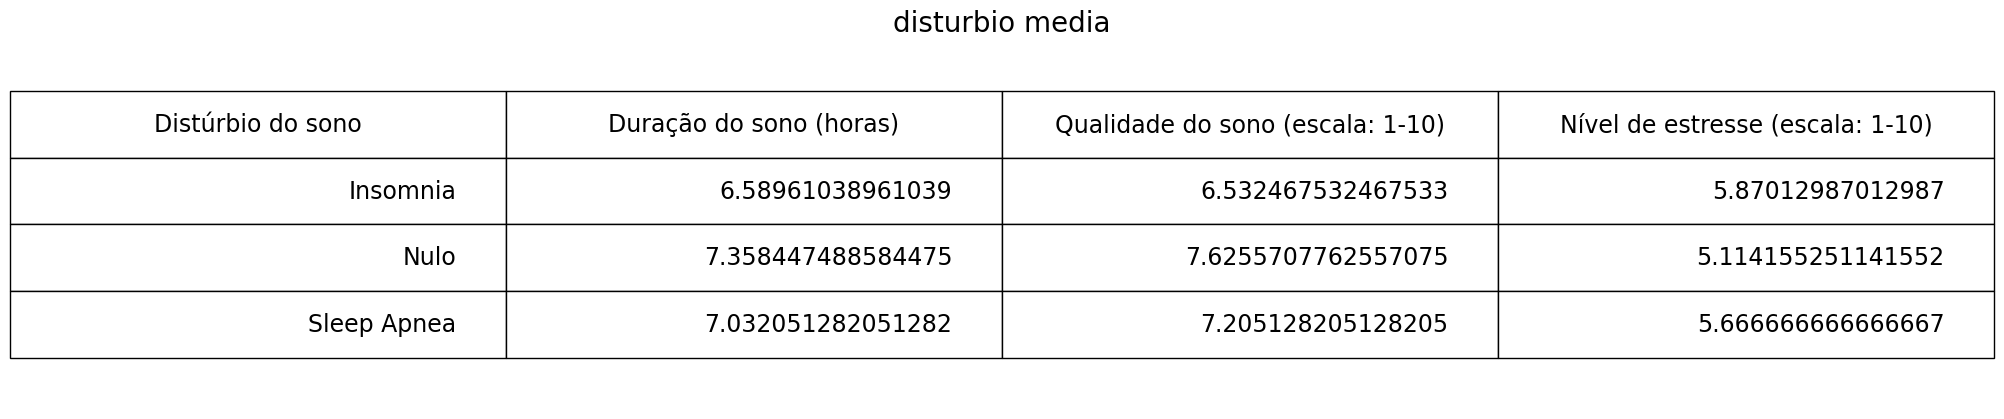

In [22]:
tabela(disturbio,'disturbio media',y=1)

### Quantidade

In [23]:
data['Distúrbio do sono'].value_counts()

Distúrbio do sono
Nulo           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [24]:
data['Categoria de IMC'].value_counts()

Categoria de IMC
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [25]:
data['Gênero'].value_counts()

Gênero
Male      189
Female    185
Name: count, dtype: int64

# Classificação 

In [26]:
import copy
from sklearn.preprocessing   import LabelBinarizer,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics         import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report,roc_auc_score,roc_curve
from sklearn.linear_model    import LogisticRegression
from sklearn.naive_bayes     import MultinomialNB,BernoulliNB
from sklearn.multiclass      import OneVsRestClassifier
from sklearn.svm             import SVC
from sklearn.exceptions      import *
from sklearn.neighbors       import KNeighborsClassifier

In [27]:
dataset = copy.deepcopy(data)

In [28]:
dataset.head(3)

,ID da pessoa,Gênero,Idade,Ocupação,Duração do sono (horas),Qualidade do sono (escala: 1-10),Nível de atividade física (minutos/dia),Nível de estresse (escala: 1-10),Categoria de IMC,Frequência cardíaca (bpm),Passos diários,Distúrbio do sono,Pressão arterial sistólica,Pressão arterial diastólica
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Nulo,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Nulo,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Nulo,125,80


## Transformacao de dados str para numerico

### Genero

In [29]:
LabelBinarizerGenero = LabelBinarizer()

In [30]:
dataset['Gênero'] = LabelBinarizerGenero.fit_transform(dataset['Gênero'])

In [31]:
classesGenero =  LabelBinarizerGenero.classes_

In [32]:
print(classesGenero)

['Female' 'Male']


### Ocupação

In [33]:
LabelEncoderOcupacao = LabelEncoder()

In [34]:
dataset['Ocupação'] = LabelEncoderOcupacao.fit_transform(dataset['Ocupação'])

In [35]:
ClassesOcupacao = LabelEncoderOcupacao.classes_

In [36]:
print(ClassesOcupacao)

['Accountant' 'Doctor' 'Engineer' 'Lawyer' 'Manager' 'Nurse'
 'Sales Representative' 'Salesperson' 'Scientist' 'Software Engineer'
 'Teacher']


### Categoria

In [37]:
LabelEncoderCategorias = LabelEncoder()

In [38]:
dataset['Categoria de IMC'] = LabelEncoderCategorias.fit_transform(dataset['Categoria de IMC'].values)

In [39]:
classesCategorias = LabelEncoderCategorias.classes_

In [40]:
print(classesCategorias)

['Normal' 'Normal Weight' 'Obese' 'Overweight']


### Disturbios

In [41]:
LabelEncoderDisturbios  = LabelEncoder()

In [42]:
dataset['Distúrbio do sono'] = LabelEncoderDisturbios.fit_transform(dataset['Distúrbio do sono'])

In [43]:
classesDisturbios = LabelEncoderDisturbios.classes_

In [44]:
print(classesDisturbios)

['Insomnia' 'Nulo' 'Sleep Apnea']


### Correlação

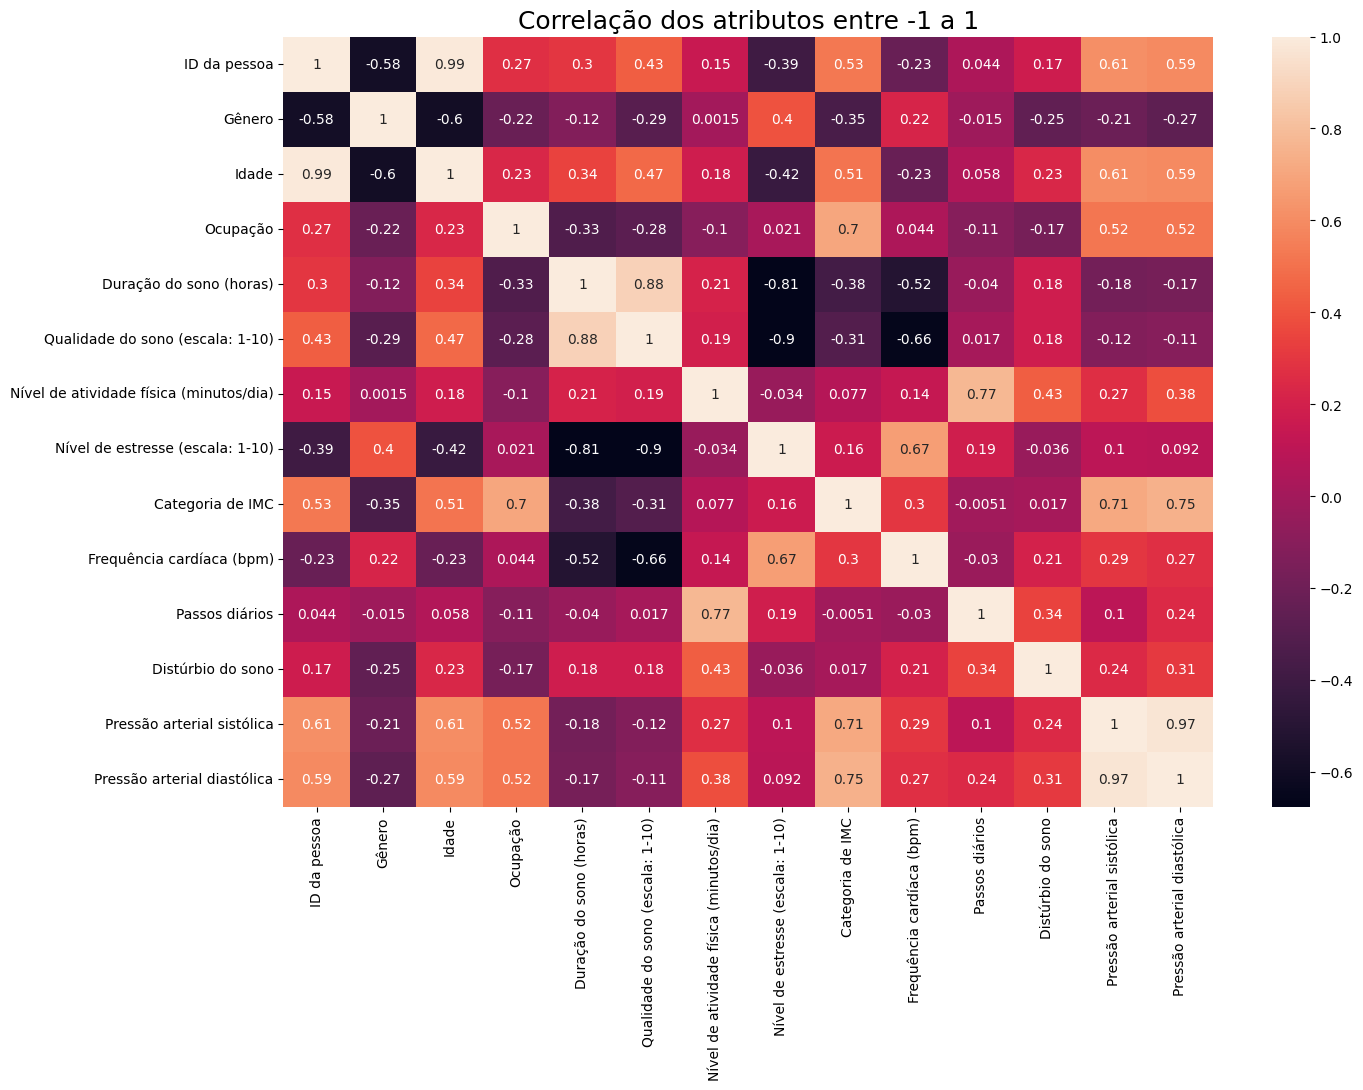

In [45]:
plt.figure(figsize=(15,10))
plt.title('Correlação dos atributos entre -1 a 1',size=18)
sea.heatmap(dataset.corr(),annot=True,robust=True)
plt.show()

## GetDummies para categoria e ocupaçãox

In [46]:
dummies = pd.get_dummies(dataset['Categoria de IMC'],prefix='Categoria de IMC',dtype=int)
dataset = copy.deepcopy(
    pd.concat([dataset,dummies],axis=1)
)

In [47]:
dummies = pd.get_dummies(dataset['Ocupação'],prefix='Ocupação',dtype=int)
dataset = copy.deepcopy(
    pd.concat([dataset,dummies],axis=1)
)

In [48]:
dataset.drop(columns=['Categoria de IMC','Ocupação'],inplace=True)

### Conjunto de dados tratados para classificação

In [49]:
dataset.head(2)

,ID da pessoa,Gênero,Idade,Duração do sono (horas),Qualidade do sono (escala: 1-10),Nível de atividade física (minutos/dia),Nível de estresse (escala: 1-10),Frequência cardíaca (bpm),Passos diários,Distúrbio do sono,...,Ocupação_1,Ocupação_2,Ocupação_3,Ocupação_4,Ocupação_5,Ocupação_6,Ocupação_7,Ocupação_8,Ocupação_9,Ocupação_10
0,1,1,27,6.1,6,42,6,77,4200,1,...,0,0,0,0,0,0,0,0,1,0
1,2,1,28,6.2,6,60,8,75,10000,1,...,1,0,0,0,0,0,0,0,0,0


## Pegando base de dados
Para __X__ não serao usados as colunas `['Distúrbio do sono','ID da pessoa']`\
Para __Y__ será usado `['Distúrbio do sono']`

In [50]:
X = dataset.drop(columns=['Distúrbio do sono','ID da pessoa']).values
Y = dataset['Distúrbio do sono'].values

In [51]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

## Regressão Logistica

In [52]:
RegressaoLogistica = LogisticRegression(solver='lbfgs',penalty='l2',multi_class='multinomial', max_iter=200)

In [53]:
fitRL= RegressaoLogistica.fit(x_train,y_train) 

/home/mateus/MEGA/Projetos/Classfica-aoQualidadeDoSono/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
y_predictRL = fitRL.predict(x_test)

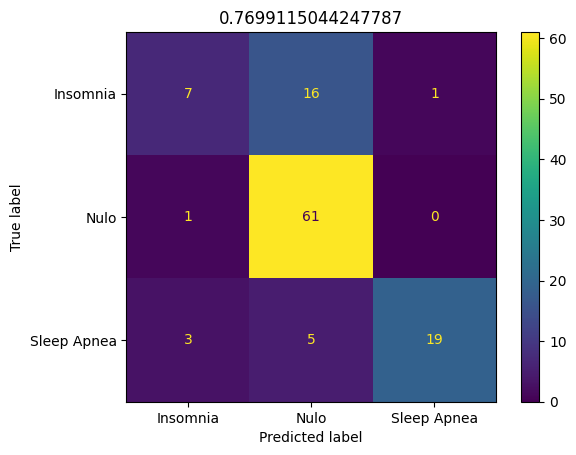

In [55]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test,y_predictRL),
    display_labels=classesDisturbios
).plot()
plt.title(f'{accuracy_score(y_test,y_predictRL)}')
plt.show()

## Gaussian

In [56]:
GaussianM = MultinomialNB()

In [57]:
fitG = GaussianM.fit(x_train,y_train)

In [58]:
y_predictGM = fitG.predict(x_test)

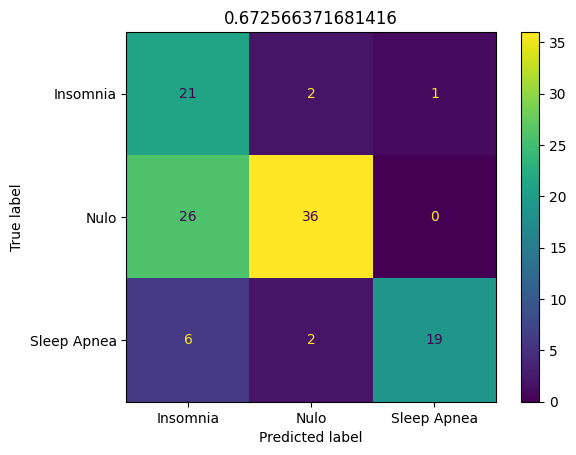

In [59]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test,y_predictGM),
    display_labels=classesDisturbios
).plot()
plt.title(f'{accuracy_score(y_test,y_predictGM)}')
plt.show()

## Bernoulli

In [60]:
Bernoulli = BernoulliNB(force_alpha=True)

In [61]:
fitB = Bernoulli.fit(x_train,y_train)

In [62]:
y_predictBER = fitB.predict(x_test)

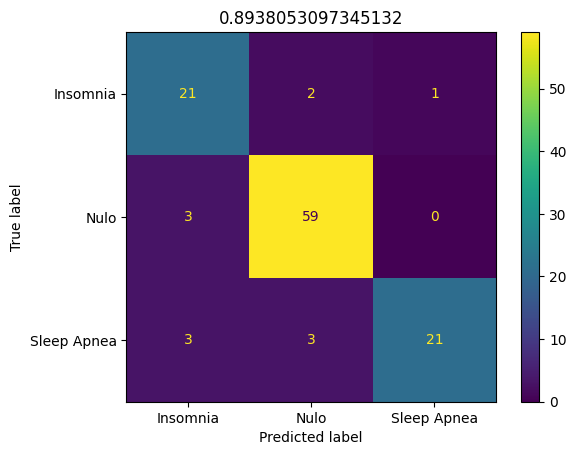

In [63]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test,y_predictBER),
    display_labels=classesDisturbios
).plot()
plt.title(f'{accuracy_score(y_test,y_predictBER)}')
plt.show()

## OneVsRestClassifier

In [64]:
OneVS = OneVsRestClassifier(SVC())

In [65]:
fitVS = OneVS.fit(x_train,y_train)

In [66]:
y_predictVS =fitVS.predict(x_test)

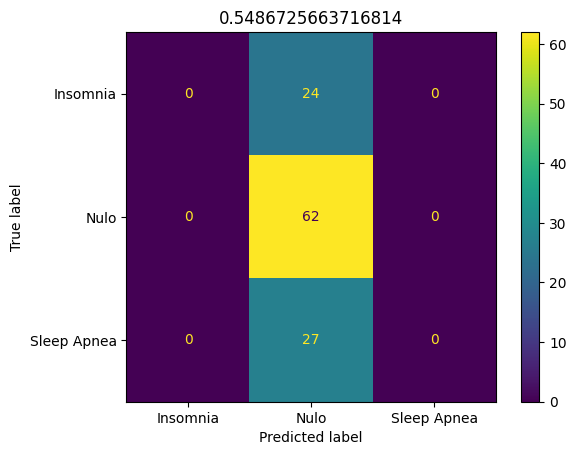

In [67]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test,y_predictVS),
    display_labels=classesDisturbios
).plot()
plt.title(f'{accuracy_score(y_test,y_predictVS)}')
plt.show()


# KNN

In [68]:
knn = KNeighborsClassifier(n_neighbors=4)

In [69]:
fitKNN = knn.fit(x_train,y_train) 

In [70]:
y_predictKNN = fitKNN.predict(x_test)

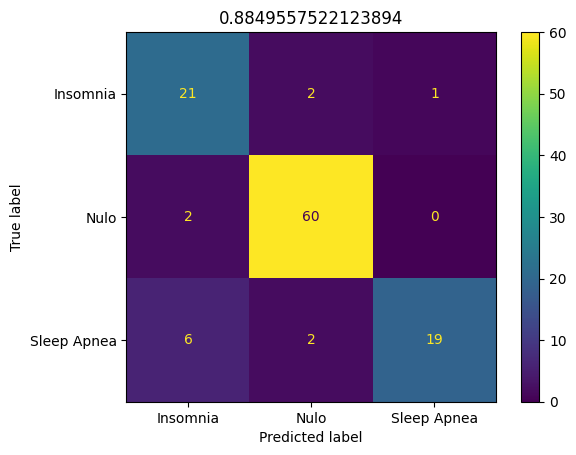

In [71]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test,y_predictKNN),
    display_labels=classesDisturbios
).plot()
plt.title(f'{accuracy_score(y_test,y_predictKNN)}')
plt.show()

### Comparação

In [72]:
for pred,name in [(y_predictRL,'REGRESSAO LOGISTICA'),(y_predictGM,'Gaussian Multinomial'),(y_predictVS,'ONE')]:
    print(name)
    print(classification_report(y_test,pred),'\n')

REGRESSAO LOGISTICA
              precision    recall  f1-score   support

           0       0.64      0.29      0.40        24
           1       0.74      0.98      0.85        62
           2       0.95      0.70      0.81        27

    accuracy                           0.77       113
   macro avg       0.78      0.66      0.69       113
weighted avg       0.77      0.77      0.74       113
 

Gaussian Multinomial
              precision    recall  f1-score   support

           0       0.40      0.88      0.55        24
           1       0.90      0.58      0.71        62
           2       0.95      0.70      0.81        27

    accuracy                           0.67       113
   macro avg       0.75      0.72      0.69       113
weighted avg       0.80      0.67      0.70       113
 

ONE
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.55      1.00      0.71        62
           2       0.00   

/home/mateus/MEGA/Projetos/Classfica-aoQualidadeDoSono/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mateus/MEGA/Projetos/Classfica-aoQualidadeDoSono/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mateus/MEGA/Projetos/Classfica-aoQualidadeDoSono/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

In [73]:
pd.DataFrame({
    'Regressao Logistica  ':accuracy_score(y_test,y_predictRL)*100,
    'Gaussian Multinomial ':accuracy_score(y_test,y_predictGM)*100,
    'Bernoulli            ':accuracy_score(y_test,y_predictBER)*100,
    'One                  ':accuracy_score(y_test,y_predictVS)*100,
    'KNN                  ':accuracy_score(y_test,y_predictKNN)*100

},index=['accuracy_score']).T

,accuracy_score
Regressao Logistica,76.991150
Gaussian Multinomial,67.256637
Bernoulli,89.380531
One,54.867257
KNN,88.495575


# Ideia / teste

Nas coluna disturbio do sono, possuem 3 classes  ['Insomnia', 'Nulo', 'Sleep Apnea'] e possuem 2 classes que mostra qual disturbio o individuo sofre ('Insomnia', 'Sleep Apnea') vou definir elas de como uma unica classes chamada disturbio , afim de aumentar minha acuracia e classficação.

In [74]:
classesDisturbios

array(['Insomnia', 'Nulo', 'Sleep Apnea'], dtype=object)

In [75]:
datasetT1 = copy.deepcopy(dataset)

In [76]:
datasetT1.loc[datasetT1['Distúrbio do sono'] == 0] = 2

In [77]:
datasetT1['Distúrbio do sono'].value_counts()

Distúrbio do sono
1    219
2    155
Name: count, dtype: int64

In [78]:
X = datasetT1.drop(columns=['Distúrbio do sono','ID da pessoa']).values
Y = datasetT1['Distúrbio do sono'].values

In [79]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [80]:
RegressaoLogistica = LogisticRegression()

In [81]:
predR1 = RegressaoLogistica.fit(x_train,y_train).predict(x_test)

/home/mateus/MEGA/Projetos/Classfica-aoQualidadeDoSono/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


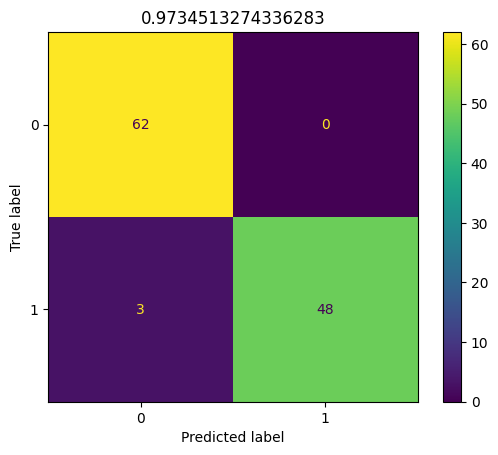

In [82]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test,predR1),
).plot()
plt.title(f'{accuracy_score(y_test,predR1)}')
plt.show()

In [83]:
print(classification_report(y_test,predR1))

              precision    recall  f1-score   support

           1       0.95      1.00      0.98        62
           2       1.00      0.94      0.97        51

    accuracy                           0.97       113
   macro avg       0.98      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



# Ideia/teste

Removendo todos os nulos para e so utilzando para classicação os disturbios

In [84]:
datasetT2 = copy.deepcopy(dataset)

In [85]:
datasetT2.drop(
    datasetT2.loc[datasetT2['Distúrbio do sono'] == 1].index,inplace=True
)

In [86]:
X = datasetT2.drop(columns=['Distúrbio do sono','ID da pessoa']).values
Y = datasetT2['Distúrbio do sono'].values

In [87]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [88]:
pred = RegressaoLogistica.fit(x_train,y_train).predict(x_test)

/home/mateus/MEGA/Projetos/Classfica-aoQualidadeDoSono/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


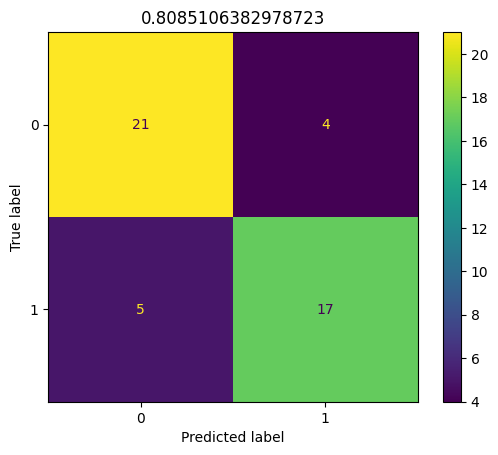

In [89]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test,pred),
).plot()
plt.title(f'{accuracy_score(y_test,pred)}')
plt.show()